<a href="https://colab.research.google.com/github/Saurav-Bhattacharjee/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
##importing libraries
import pandas as pd
import numpy  as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##Reading the dataset
df_1=pd.read_csv('/content/drive/MyDrive/Alma Better/Modules/machine learning/project/Linear regression project/Copy of SeoulBikeData.csv',encoding='latin1') 

In [5]:
df_1.head().transpose()

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [ ]:
df_1.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df_1.shape

(8760, 14)

In [ ]:
df_1.size

122640

In [6]:
df=df_1.copy()

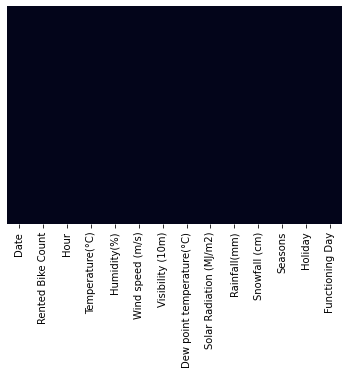

In [ ]:
##Checking for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
##For getting number of unique variables in the dataset
df.nunique(axis=1)

0       11
1       12
2       12
3       12
4       12
        ..
8755    12
8756    12
8757    12
8758    12
8759    12
Length: 8760, dtype: int64

In [ ]:
df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


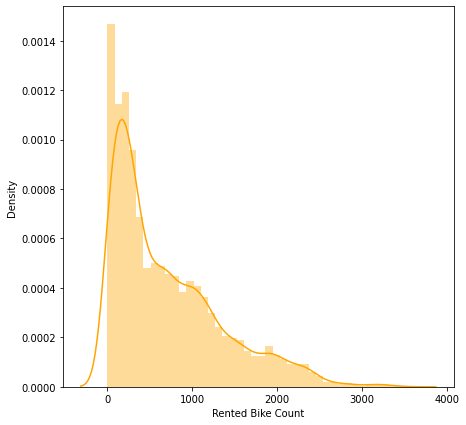

In [8]:
# Output variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="orange")

In [9]:
#find the skew
from scipy.stats import skew
skew(df['Rented Bike Count'])

1.1532306631480034

Here the rented bike count variable is skewed normal distribution and since the variable has zero values so log transformation cant be applied.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


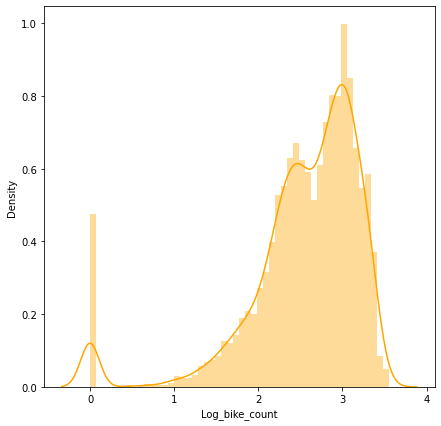

In [10]:
#logarithmic transformation
df['Log_bike_count']=np.log10(df['Rented Bike Count']+1)
plt.figure(figsize=(7,7))
sns.distplot(df['Log_bike_count'],color="orange")

In [11]:
df['Log_bike_count'].skew()

-1.8321986426412804

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


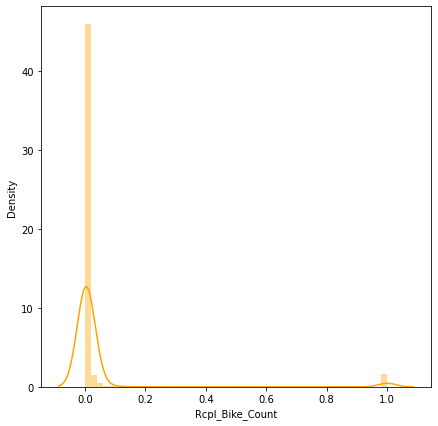

In [12]:
##Reciprocal Transformation
df['Rcpl_Bike_Count']=1/(df['Rented Bike Count']+1)
plt.figure(figsize=(7,7))
sns.distplot(df['Rcpl_Bike_Count'],color="orange")

In [11]:
df['Rcpl_Bike_Count'].skew()

5.127727685560568

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


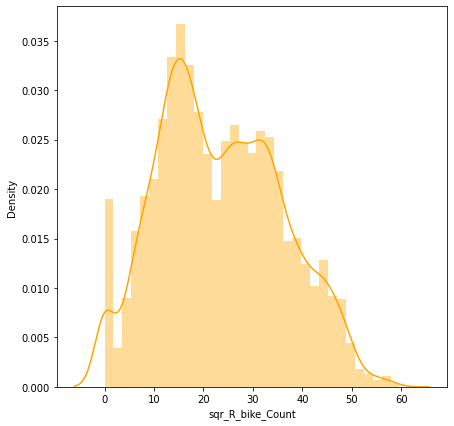

In [7]:
#Square Root Transformation
df["sqr_R_bike_Count"]=df['Rented Bike Count']**(1/2)
plt.figure(figsize=(7,7))
sns.distplot(df['sqr_R_bike_Count'],color="orange")

In [13]:
df["sqr_R_bike_Count"].skew()

0.237362090985412

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


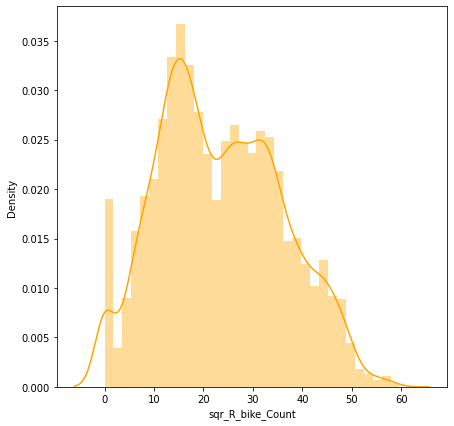

In [ ]:
#Square Root Transformation
df["sqr_R_bike_Count"]=df['Rented Bike Count']**(1/2)
plt.figure(figsize=(7,7))
sns.distplot(df['sqr_R_bike_Count'],color="orange")


In [14]:
##Exponential Transformation
df["exp_R_bike_Count"]=df['Rented Bike Count']**(1/2)
df['exp_R_bike_Count'].skew()
#plt.figure(figsize=(7,7))
#sns.distplot(df['exp_R_bike_Count'],color="orange")

0.237362090985412

## BOXCOX method could not be applied in above variable because it will work only when the variables are positive which in this case it is not as there are several values as '0'(zero).

From above the square root transformation seems to be having lowest skew.So we will be considering the square root transformation

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sqr_R_bike_Count,Log_bike_count,Rcpl_Bike_Count
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,15.937377,2.406540,0.003922
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.282857,2.311754,0.004878
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,13.152946,2.240549,0.005747
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,10.344080,2.033424,0.009259
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8.831761,1.897627,0.012658


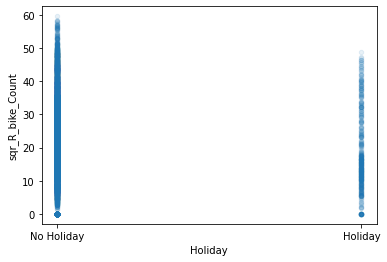

In [18]:
#Relationship of Holiday with square_Root_bike_count
df.plot(kind="scatter",x="Holiday",y="sqr_R_bike_Count",alpha=0.1)

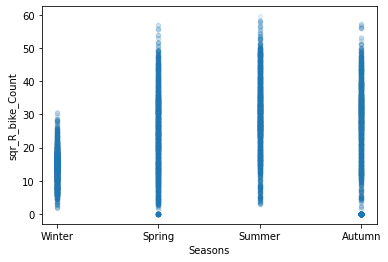

In [20]:
#Relationship of season with square_Root_bike_count
df.plot(kind="scatter",x="Seasons",y="sqr_R_bike_Count",alpha=0.1)

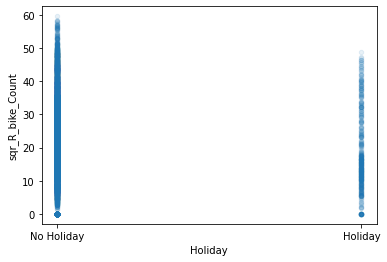

In [21]:
#Relationship of Holiday with square_Root_bike_count
df.plot(kind="scatter",x="Holiday",y="sqr_R_bike_Count",alpha=0.1)

In [14]:
#Print Categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [15]:
for feature in categorical_features:
   print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 365
The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2


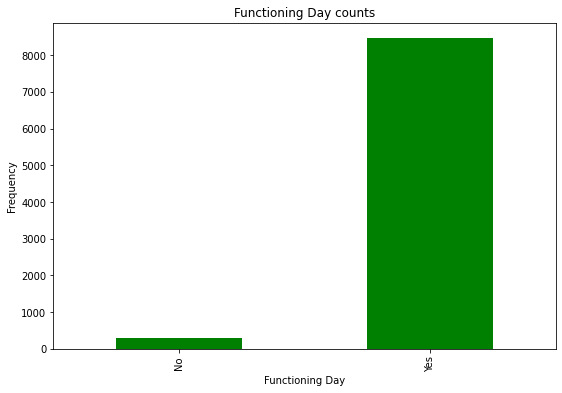

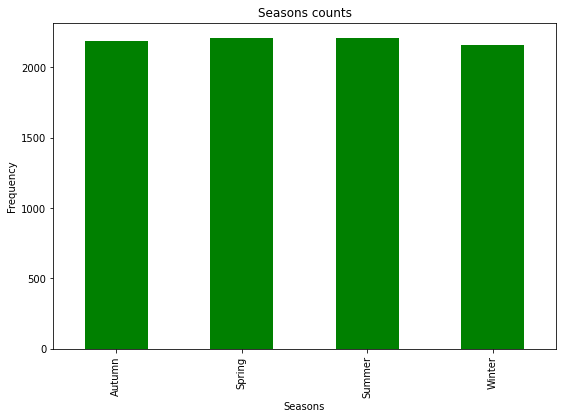

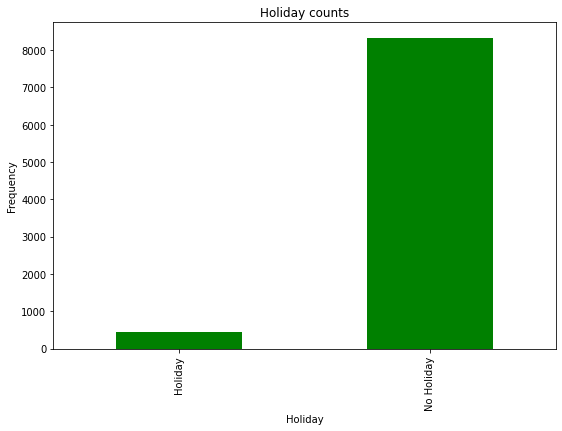

In [16]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)
temp=['Date']
final_category=diff(categorical_features,temp)
for col in final_category:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='green')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

It can be seen from above that the Bike count is different for different seasons.Summer Season has the highest bike count.

Also it can be seen that Holiday and Non Functioning day are not same

In [17]:
# finding the  total numerical columns
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'sqr_R_bike_Count', 'Log_bike_count', 'Rcpl_Bike_Count'],
      dtype='object')

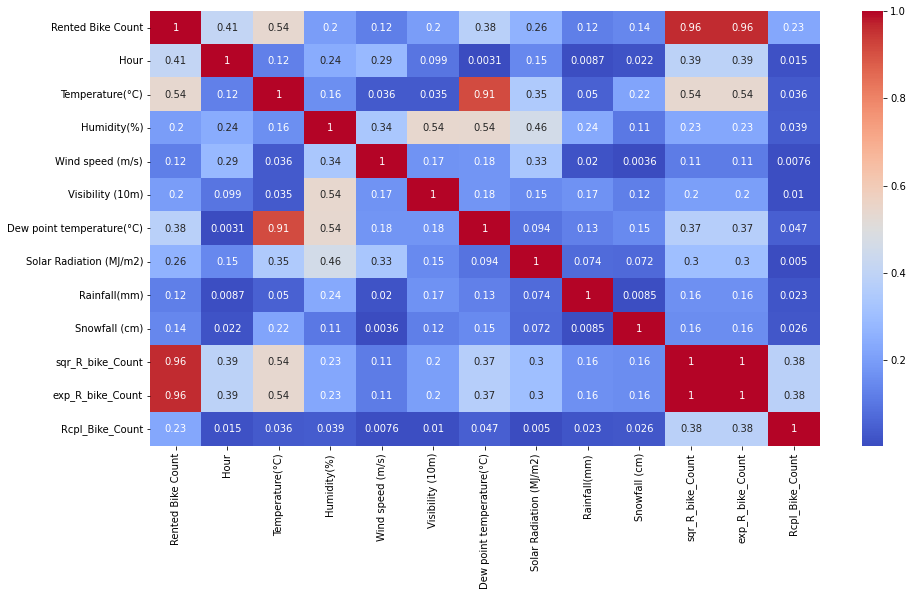

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [22]:
##For understanding the positive and negative coefficient
corr_matrix=df.corr()
corr_matrix["sqr_R_bike_Count"].sort_values(ascending=False)


sqr_R_bike_Count             1.000000
Rented Bike Count            0.962137
Log_bike_count               0.882714
Temperature(°C)              0.539489
Hour                         0.390103
Dew point temperature(°C)    0.371053
Solar Radiation (MJ/m2)      0.303047
Visibility (10m)             0.203959
Wind speed (m/s)             0.112176
Snowfall (cm)               -0.155086
Rainfall(mm)                -0.163535
Humidity(%)                 -0.227313
Rcpl_Bike_Count             -0.382089
Name: sqr_R_bike_Count, dtype: float64

In [ ]:
sns.pairplot(df,size=5) 

Above pairplot shows that the bike count has the following relation with the varibles:-
  1.With Hour it increases upto approx 18 hours and after that it decreases
2 .With temp it increases but 25C after which it decreases
3.With Humidity it increases upto 50% but decreases after that.
4.With wind speed it increases upto 3m/s but after that it increases
5.with visibility it increases linearly with it.
6.With rainfall and snowfall it is inversly related with it.More than 0mm it directly falls.   

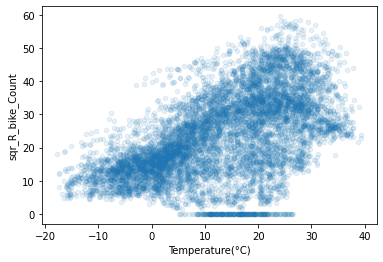

In [23]:
##Verifying the promising attributes i.e Temperature and hour
df.plot(kind="scatter",x="Temperature(°C)",y="sqr_R_bike_Count",alpha=0.1)

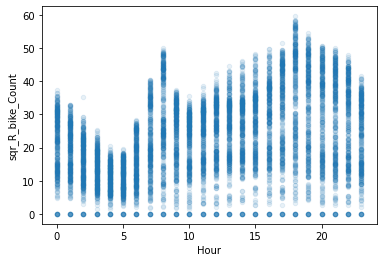

In [24]:
df.plot(kind="scatter",x="Hour",y="sqr_R_bike_Count",alpha=0.1)

Now since the above two parameters are considered so we need to find the parameters which are  dependent on Temperature and Hour and remove it as considering those will be resoponsible for doubling effect.

In [25]:
##Finding the parameteres dependent on temperature
corr_matrix1=df.corr()
corr_matrix["Temperature(°C)"].sort_values(ascending=False)


Temperature(°C)              1.000000
Dew point temperature(°C)    0.912798
sqr_R_bike_Count             0.539489
Rented Bike Count            0.538558
Log_bike_count               0.366970
Solar Radiation (MJ/m2)      0.353505
Humidity(%)                  0.159371
Hour                         0.124114
Rainfall(mm)                 0.050282
Rcpl_Bike_Count              0.035960
Visibility (10m)             0.034794
Wind speed (m/s)            -0.036252
Snowfall (cm)               -0.218405
Name: Temperature(°C), dtype: float64

In [26]:
##Finding the parameteres dependent on temperature
corr_matrix2=df.corr()
corr_matrix2['Rainfall(mm)'].sort_values(ascending=False)

Rainfall(mm)                 1.000000
Humidity(%)                  0.236397
Dew point temperature(°C)    0.125597
Temperature(°C)              0.050282
Rcpl_Bike_Count              0.023386
Hour                         0.008715
Snowfall (cm)                0.008500
Wind speed (m/s)            -0.019674
Solar Radiation (MJ/m2)     -0.074290
Rented Bike Count           -0.123074
sqr_R_bike_Count            -0.163535
Visibility (10m)            -0.167629
Log_bike_count              -0.181552
Name: Rainfall(mm), dtype: float64

In [28]:
##Creating a copy before deleting
df2=df.copy()


In [27]:
##Display Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'sqr_R_bike_Count', 'Log_bike_count',
       'Rcpl_Bike_Count'],
      dtype='object')

In [ ]:
#@ Analysing the numerical varibles
# ploting a bar plot for each numerical feature count (Except State,Churn,International Plan and Voice mail plan)

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Churn1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [35]:
# finding the  total numerical columns
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'sqr_R_bike_Count', 'Log_bike_count', 'Rcpl_Bike_Count'],
      dtype='object')

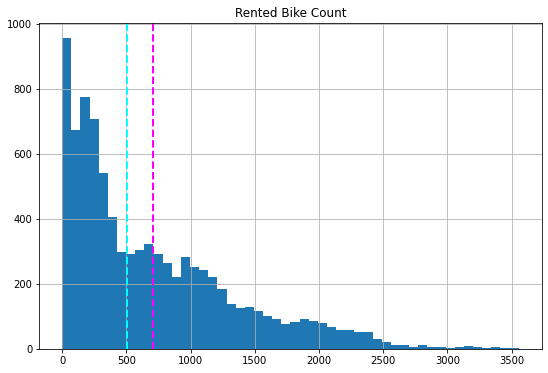

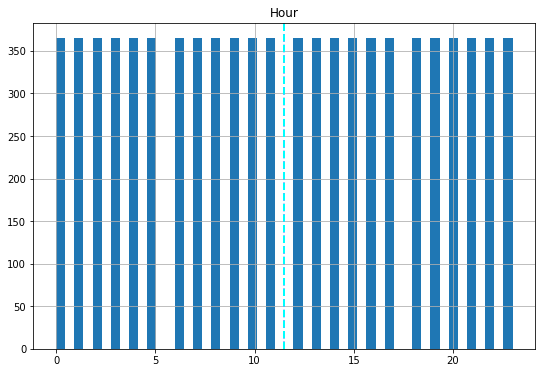

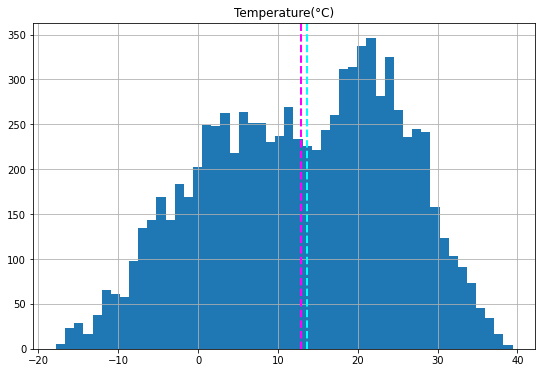

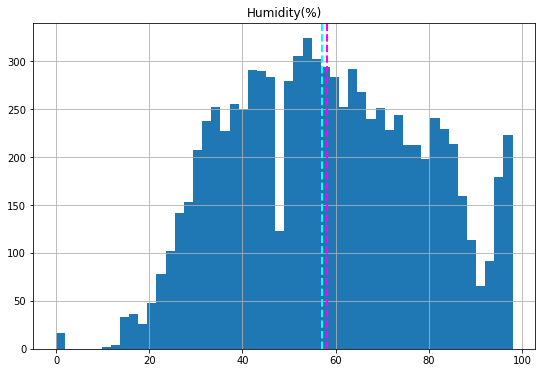

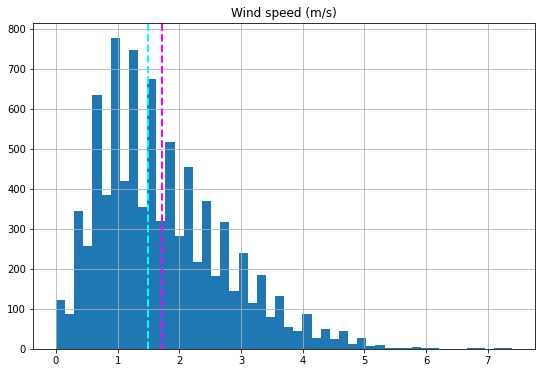

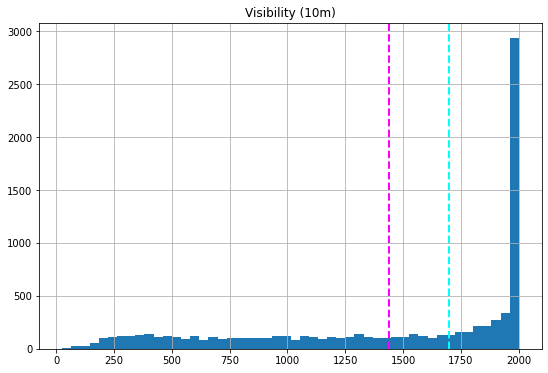

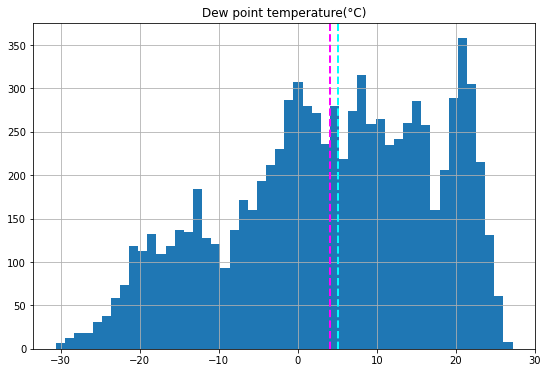

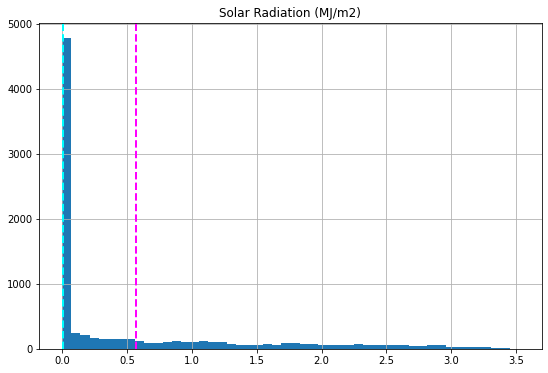

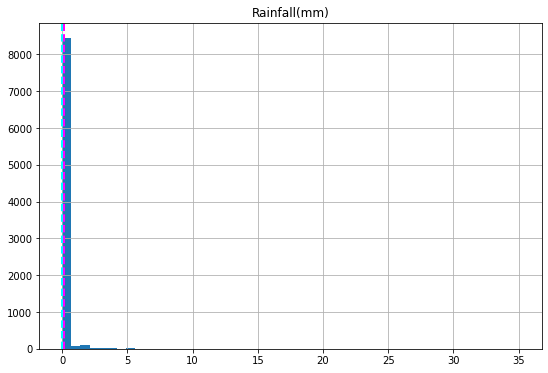

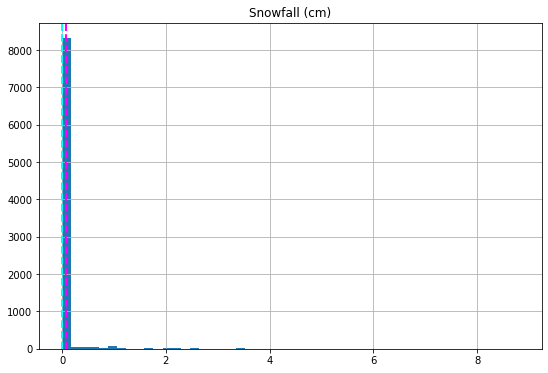

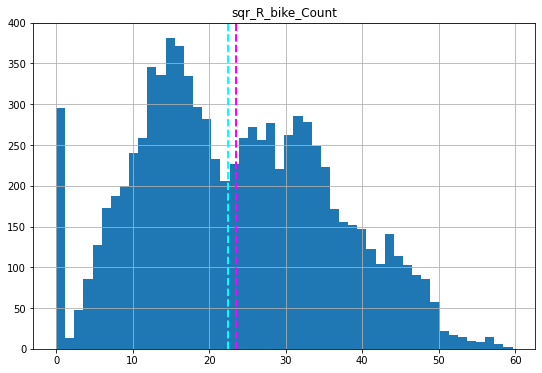

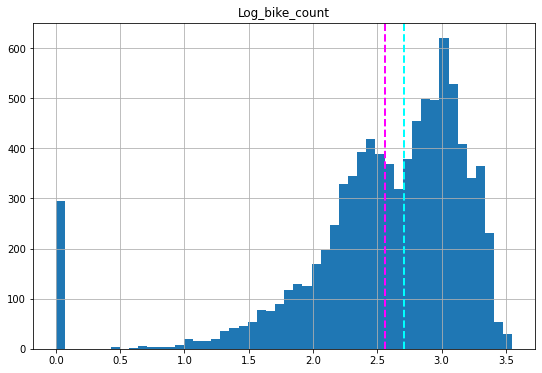

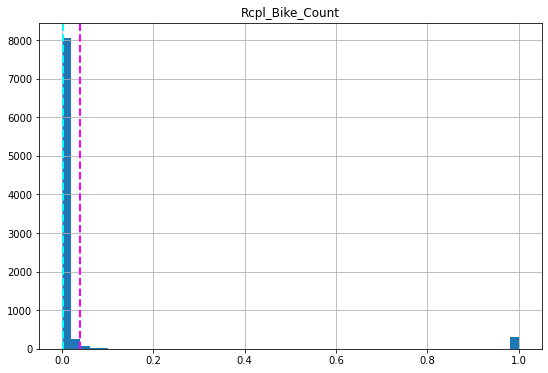

In [36]:
#@ Analysing the numerical varibles
# ploting a bar plot for each numerical feature count (Except State,Churn,International Plan and Voice mail plan)

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
##Removing the unimportant date columns
df.drop(["Date","Dew point temperature(°C)","Rented Bike Count","exp_R_bike_Count",'Log_bike_count', 'Rcpl_Bike_Count',],axis=1,inplace=True)
df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sqr_R_bike_Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,15.937377
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,14.282857
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,13.152946
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10.344080
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,8.831761


In [ ]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday','Functioning Day'])
df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),sqr_R_bike_Count,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,15.937377,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,14.282857,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,13.152946,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,10.344080,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,8.831761,0,0,0,1,0,1,0,1


In [ ]:
dependent_variable = 'sqr_R_bike_Count'


In [33]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
len(independent_variables)

NameError: ignored

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

array([[0.000e+00, 0.000e+00, 1.220e+00, 1.000e+00, 2.910e+02, 1.000e+00,
        6.000e-01, 6.200e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.500e+01, 0.000e+00, 0.000e+00, 8.200e+00],
       [0.000e+00, 0.000e+00, 8.400e-01, 1.000e+00, 2.000e+03, 1.000e+00,
        2.400e+00, 5.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.800e+01, 0.000e+00, 1.000e+00, 2.840e+01],
       [0.000e+00, 1.000e-01, 8.800e-01, 1.000e+00, 1.992e+03, 1.000e+00,
        1.700e+00, 5.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+01, 0.000e+00, 1.000e+00, 2.990e+01],
       [0.000e+00, 0.000e+00, 2.200e+00, 1.000e+00, 1.749e+03, 1.000e+00,
        6.000e-01, 2.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+01, 1.000e+00, 0.000e+00, 1.480e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+03, 1.000e+00,
        1.100e+00, 4.700e+01, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+01, 0.000e+00, 0.000e+00, 1.220e+

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

35270416058716.266

In [ ]:
regressor.coef_

array([ 9.84693666e-01, -5.21159905e+01, -2.90101868e+00, -1.53000048e+13,
        4.22928566e-01,  2.70821657e+11,  8.60397594e-01, -1.55329606e+01,
       -2.02412329e+13, -1.53000048e+13, -2.02412329e+13,  2.70821657e+11,
        1.12761077e+01, -2.02412329e+13, -2.02412329e+13,  2.70892998e+01])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

array([17.66352173, 53.25410782, 26.66458325, ..., 32.64965543,
       20.02498439, 22.64950331])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data
y_pred

array([18.3203125, 25.125    , 18.15625  , ..., 14.3515625, 32.6171875,
       20.546875 ])

In [ ]:
# Actual profits on test data
y_test

array([17.88854382, 24.08318916, 15.03329638, ..., 14.59451952,
       36.48287269, 27.98213716])

In [ ]:
mean_squared_error(y_test, y_pred)

54.6165534374485

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.329610061767164

In [ ]:
r2_score(y_train, y_pred_train)

0.6519011425816823

In [ ]:
r2_score(y_test, y_pred)

0.6531979715797477

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


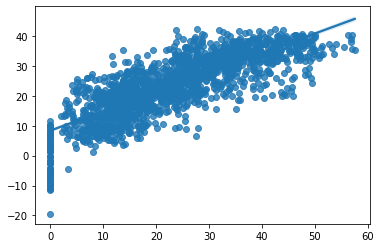

In [ ]:
sns.regplot(y_test,y_pred)

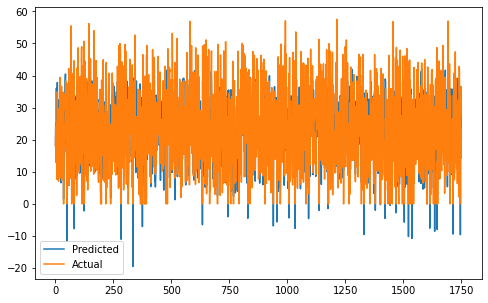

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.6519120112878656

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+04, tolerance: 8.747e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+04, tolerance: 8.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -53.97529762399178


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

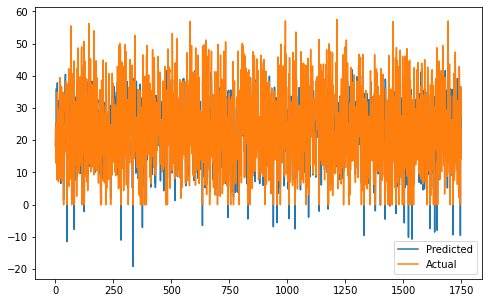

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 54.674066663680094
RMSE : 7.394191413784207
R2 : 0.6528327763731159
Adjusted R2 :  0.6496312342532138


##Remeber to check the output if variable is log bcz if its log then we have to do 10**(y_test))

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -187109.19553936707


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 190611.5461394165
RMSE : 436.59082232614156
R2 : 0.5445609116502812
Adjusted R2 :  0.5400958225488134


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.4745934206924076

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 227988.51952595054
RMSE : 477.4814336976366
R2 : 0.4552539676103651
Adjusted R2 :  0.4499133202339961


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e+08, tolerance: 2.359e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.190e+08, tolerance: 2.299e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -187280.21027424544


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 190734.28093844786
RMSE : 436.7313601499758
R2 : 0.54426765436282
Adjusted R2 :  0.5397996901899065


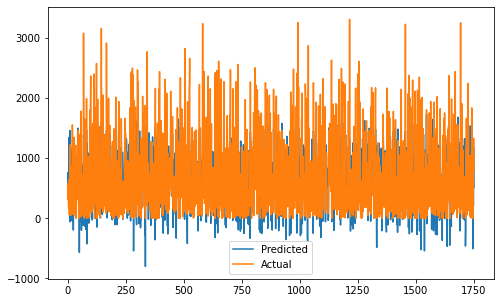

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()